In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
assets = pd.read_csv('Data/assets_py.csv', index_col='codigo')
assets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, ABCP11 to XTED11
Data columns (total 9 columns):
titulo          390 non-null object
endereco        390 non-null object
bairro          349 non-null object
estado          390 non-null object
cidade          390 non-null object
area            390 non-null object
full_address    390 non-null object
latitude        390 non-null float64
longitude       390 non-null float64
dtypes: float64(2), object(7)
memory usage: 30.5+ KB


In [3]:
assets.sort_values(by='cidade').cidade.unique()

array(['Americana', 'Anápolis', 'Aparecida de Goiânia', 'Aracaju',
       'Araçatuba', 'Arroio do Sal', 'Atibaia', 'Barueri', 'Bauru',
       'Belo Horizonte', 'Belém', 'Betim', 'Blumenau', 'Boituva',
       'Brasilia', 'Brasília', 'Cachoeirinha', 'Cajamar', 'Campinas',
       'Campo Grande', 'Campo Largo', 'Campos Goytacazes', 'Carapicuiba',
       'Cascavel', 'Caxias do Sul', 'Colombo', 'Contagem', 'Cotia',
       'Cruz Alta', 'Cuiabá', 'Curitiba', 'Diadema', 'Duque de Caixas',
       'Duque de Caxias', 'Embu-Guaçu', 'Esteio', 'Extrema',
       'Florianópolis', 'Fortaleza', 'General Câmara', 'Goiânia',
       'Guarulhos', 'Hortolândia', 'Ibiporã', 'Ilhéus', 'Iracemópolis',
       'Itajaí', 'Itapeva', 'Itapevi', 'Itaquaquecetuba', 'Jarinu',
       'Joinville', 'João Pessoa', 'Juiz Fora', 'Juiz de Fora', 'Jundiaí',
       'Louveira', 'Macaé', 'Maceió', 'Manaus', 'Manuas', 'Maracanaú',
       'Maringa', 'Mogi das Cruzes', 'Monte Mor', 'Natal', 'Navegantes',
       'Niteroi', 'Niterói', 

In [4]:
assets.estado.value_counts()

SP    217
RJ     68
RS     26
MG     22
PR     14
SC      7
DF      5
BA      5
CE      5
PE      4
MT      4
GO      3
PA      3
AM      2
RN      1
MS      1
SE      1
PB      1
AL      1
Name: estado, dtype: int64

In [5]:
class RegionClassifier(object):    
    def __init__(self):
        self._southeast = {'SP', 'MG', 'RJ', 'RS'}
        self._southeast_string = 'Sudeste'
        self._south = {'RS', 'SC', 'PR'}
        self._south_string = 'Sul'
        self._north_northeast = {'AL','AM', 'BA', 'CE', 'PE', 'RN', 'PA', 'PB', 'SE'}
        self._north_northeast_string = 'Norte-Nordeste'
        self._central = {'DF', 'GO', 'MT', 'MS'}
        self._central_string = 'Centro-Oeste'
        
    def region_from_uf(self, state_uf):
        if state_uf in self._southeast:
            return self._southeast_string
        elif state_uf in self._south:
            return self._south_string
        elif state_uf in self._central:
            return self._central_string
        elif state_uf in self._north_northeast:
            return self._north_northeast_string
        
        return 'Desconhecido'

In [6]:
region_classifier = RegionClassifier()
assets['regiao'] = assets.estado.apply(region_classifier.region_from_uf)
assets.groupby('regiao').estado.value_counts()

regiao          estado
Centro-Oeste    DF          5
                MT          4
                GO          3
                MS          1
Norte-Nordeste  BA          5
                CE          5
                PE          4
                PA          3
                AM          2
                AL          1
                PB          1
                RN          1
                SE          1
Sudeste         SP        217
                RJ         68
                RS         26
                MG         22
Sul             PR         14
                SC          7
Name: estado, dtype: int64

In [7]:
funds = pd.read_csv('Data/fundos.csv', sep = ';', index_col='codigo')
funds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, ABCP11 to XTED11
Data columns (total 9 columns):
nome                    118 non-null object
preco                   118 non-null object
volume_medio            118 non-null int64
dividend_yield          117 non-null float64
patrimonio_liquido      118 non-null object
p_vp                    118 non-null float64
cotas                   117 non-null float64
segmento                117 non-null object
valorizacao_12_meses    118 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 9.2+ KB


In [8]:
#funds['patrimonio_liquido'] = funds['patrimonio_liquido'].apply(lambda value: value. value.split('R$|mi')[1].strip())
funds['multiplier'] = 0
funds.loc[funds['patrimonio_liquido'].apply(lambda value: 'mi' in value), 'multiplier']  = 1_000_000
funds.loc[funds['patrimonio_liquido'].apply(lambda value: 'bi' in value), 'multiplier']  = 1_000_000_000
funds['patrimonio_liquido'] = funds['patrimonio_liquido'].apply(lambda value: value.replace('R$', '').replace('mi', '').replace('bi', '').replace(',', '.')).astype('float64')
funds['patrimonio_liquido'] = funds['patrimonio_liquido'] * funds['multiplier']
funds.drop('multiplier', axis = 1, inplace = True)
funds['patrimonio_liquido_em_milhoes'] = funds['patrimonio_liquido'] / 1_000_000
funds

,nome,preco,volume_medio,dividend_yield,patrimonio_liquido,p_vp,cotas,segmento,valorizacao_12_meses,patrimonio_liquido_em_milhoes
codigo,,,,,,,,,,
ABCP11,FDO INV IMOB GRAND PLAZA SHOPPING,"R$ 99,78",4519,0.44,9.100000e+08,1.35,1000000.0,Shoppings,0.15,910.0
AEFI11,AESAPAR FDO INV IMOB - FII,"R$ 174,90",2065,0.71,1.100000e+08,1.15,752500.0,Outros,0.03,110.0
AGCX11,FDO INV IMOB AGÊNCIAS CAIXA - FII,"R$ 1.235,50",240,0.69,4.300000e+08,1.16,405000.0,Outros,0.00,430.0
ALZR11,ALIANZA TRUST RENDA IMOBILIARIA FDO INV IMOB,"R$ 97,50",3435,0.69,9.700000e+07,1.00,997042.0,Outros,0.02,97.0
BBFI11B,BB FDO INV IMOB PROGRESSIVO,"R$ 2.388,00",144,1.04,4.000000e+08,0.78,130000.0,Lajes Corporativas,0.14,400.0
BBPO11,BB PROGRESSIVO II FDO INV IMOB - FII,"R$ 139,00",21486,0.73,1.600000e+09,1.35,15919690.0,Lajes Corporativas,0.08,1600.0
BBRC11,BB RENDA CORPORATIVA FDO INV IMOB - FII,"R$ 132,60",1006,0.69,1.600000e+08,1.30,1590000.0,Outros,0.06,160.0
BBVJ11,FDO INV IMOB BB VOTORANTIM JHSF C JARD CONT TOWER,"R$ 58,04",5071,0.61,1.600000e+08,0.99,2710000.0,Lajes Corporativas,-0.02,160.0
BCFF11,FDO INV IMOB - FII BTG PACTUAL FUNDO DE FUNDOS,"R$ 84,51",27383,0.62,7.300000e+08,0.98,1452738.0,Títulos e Val. Mob.,-0.04,730.0


In [9]:
funds['preco'] = funds['preco'].apply(lambda value: value.replace('R$', '').replace('.', '').replace(',','.')).astype('float64')
funds

,nome,preco,volume_medio,dividend_yield,patrimonio_liquido,p_vp,cotas,segmento,valorizacao_12_meses,patrimonio_liquido_em_milhoes
codigo,,,,,,,,,,
ABCP11,FDO INV IMOB GRAND PLAZA SHOPPING,99.78,4519,0.44,9.100000e+08,1.35,1000000.0,Shoppings,0.15,910.0
AEFI11,AESAPAR FDO INV IMOB - FII,174.90,2065,0.71,1.100000e+08,1.15,752500.0,Outros,0.03,110.0
AGCX11,FDO INV IMOB AGÊNCIAS CAIXA - FII,1235.50,240,0.69,4.300000e+08,1.16,405000.0,Outros,0.00,430.0
ALZR11,ALIANZA TRUST RENDA IMOBILIARIA FDO INV IMOB,97.50,3435,0.69,9.700000e+07,1.00,997042.0,Outros,0.02,97.0
BBFI11B,BB FDO INV IMOB PROGRESSIVO,2388.00,144,1.04,4.000000e+08,0.78,130000.0,Lajes Corporativas,0.14,400.0
BBPO11,BB PROGRESSIVO II FDO INV IMOB - FII,139.00,21486,0.73,1.600000e+09,1.35,15919690.0,Lajes Corporativas,0.08,1600.0
BBRC11,BB RENDA CORPORATIVA FDO INV IMOB - FII,132.60,1006,0.69,1.600000e+08,1.30,1590000.0,Outros,0.06,160.0
BBVJ11,FDO INV IMOB BB VOTORANTIM JHSF C JARD CONT TOWER,58.04,5071,0.61,1.600000e+08,0.99,2710000.0,Lajes Corporativas,-0.02,160.0
BCFF11,FDO INV IMOB - FII BTG PACTUAL FUNDO DE FUNDOS,84.51,27383,0.62,7.300000e+08,0.98,1452738.0,Títulos e Val. Mob.,-0.04,730.0


In [10]:
assets_funds = assets.join(funds, on = 'codigo')
assets_funds.head()

,titulo,endereco,bairro,estado,cidade,area,full_address,latitude,longitude,regiao,nome,preco,volume_medio,dividend_yield,patrimonio_liquido,p_vp,cotas,segmento,valorizacao_12_meses,patrimonio_liquido_em_milhoes
codigo,,,,,,,,,,,,,,,,,,,,
ABCP11,Grand Plaza Shopping,"Avenida Industrial, 600",Tamanduateí 3,SP,Santo André,"69.628,00 m2","Avenida Industrial, 600, Santo André, SP",-23.6497,-46.5323,Sudeste,FDO INV IMOB GRAND PLAZA SHOPPING,99.78,4519,0.44,910000000.0,1.35,1000000.0,Shoppings,0.15,910.0
AEFI11,Campinas,"Avenida John Boyd Dunlop, s/n",Jardim Ipaussurama,SP,Campinas,"96.435,16 m2","Avenida John Boyd Dunlop, s/n, Campinas, SP",-22.9102,-47.0957,Sudeste,AESAPAR FDO INV IMOB - FII,174.90,2065,0.71,110000000.0,1.15,752500.0,Outros,0.03,110.0
AEFI11,Cuiabá,"Avenida Fernando Corrêa da Costa, s/nº",Nossa Senhora Aparecida,MT,Cuiabá,"25.000,00 m2","Avenida Fernando Corrêa da Costa, s/nº, Cuiabá...",-15.6099,-56.0783,Centro-Oeste,AESAPAR FDO INV IMOB - FII,174.90,2065,0.71,110000000.0,1.15,752500.0,Outros,0.03,110.0
AGCX11,Ag 14 Bis,"Avenida Marechal Câmara, 160",Centro,RJ,Rio de Janeiro,"1.900,31 m2","Avenida Marechal Câmara, 160, Rio de Janeiro, RJ",-22.9098,-43.1691,Sudeste,FDO INV IMOB AGÊNCIAS CAIXA - FII,1235.50,240,0.69,430000000.0,1.16,405000.0,Outros,0.00,430.0
AGCX11,Ag Avenida Chile,"Avenida República do Chile, 230",Centro,RJ,Rio de Janeiro,"1.139,67 m2","Avenida República do Chile, 230, Rio de Janeir...",-33.4313,-70.6436,Sudeste,FDO INV IMOB AGÊNCIAS CAIXA - FII,1235.50,240,0.69,430000000.0,1.16,405000.0,Outros,0.00,430.0


[Text(0, 0.5, 'Volume Médio'), Text(0.5, 0, 'Região')]

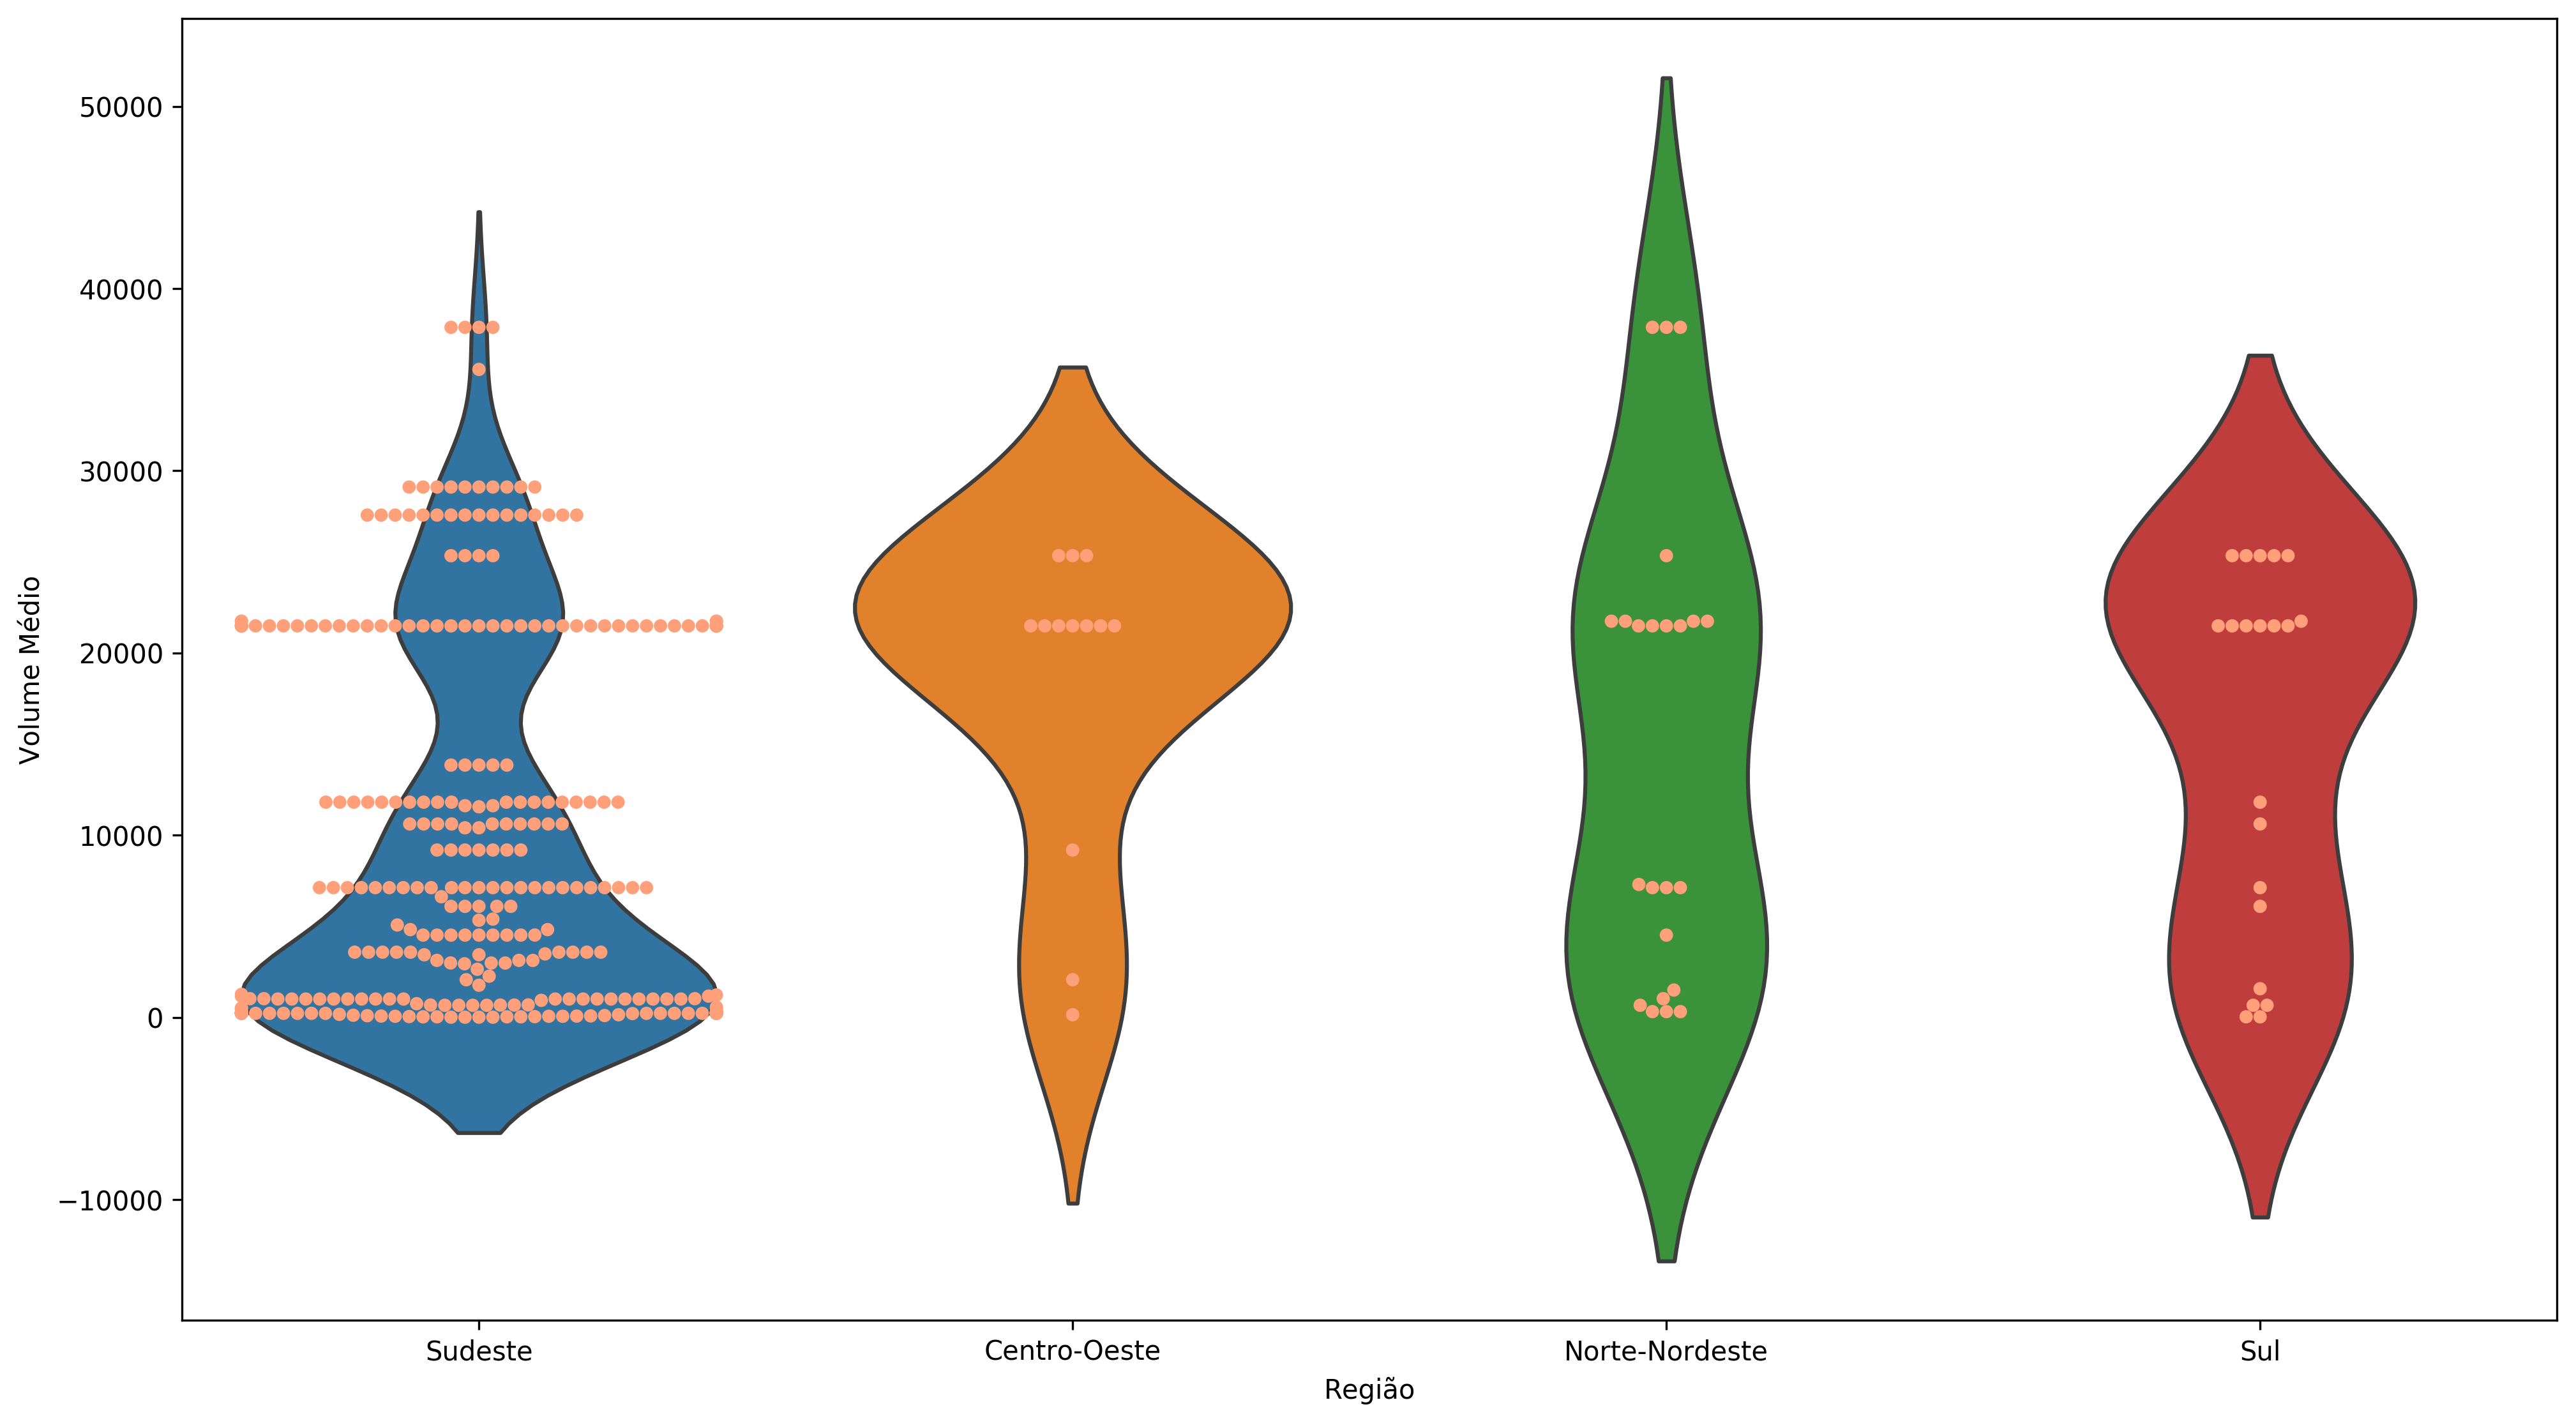

In [11]:
plt.figure(figsize=(16, 9), dpi= 300, facecolor='w', edgecolor='k')
ax = sns.violinplot(x="regiao", y="volume_medio", data=assets_funds, inner=None)
ax = sns.swarmplot(x="regiao", y="volume_medio", data=assets_funds, color="lightsalmon", edgecolor="black")
ax.set(xlabel='Região', ylabel='Volume Médio')

[Text(0, 0.5, 'P/VP'), Text(0.5, 0, 'Região')]

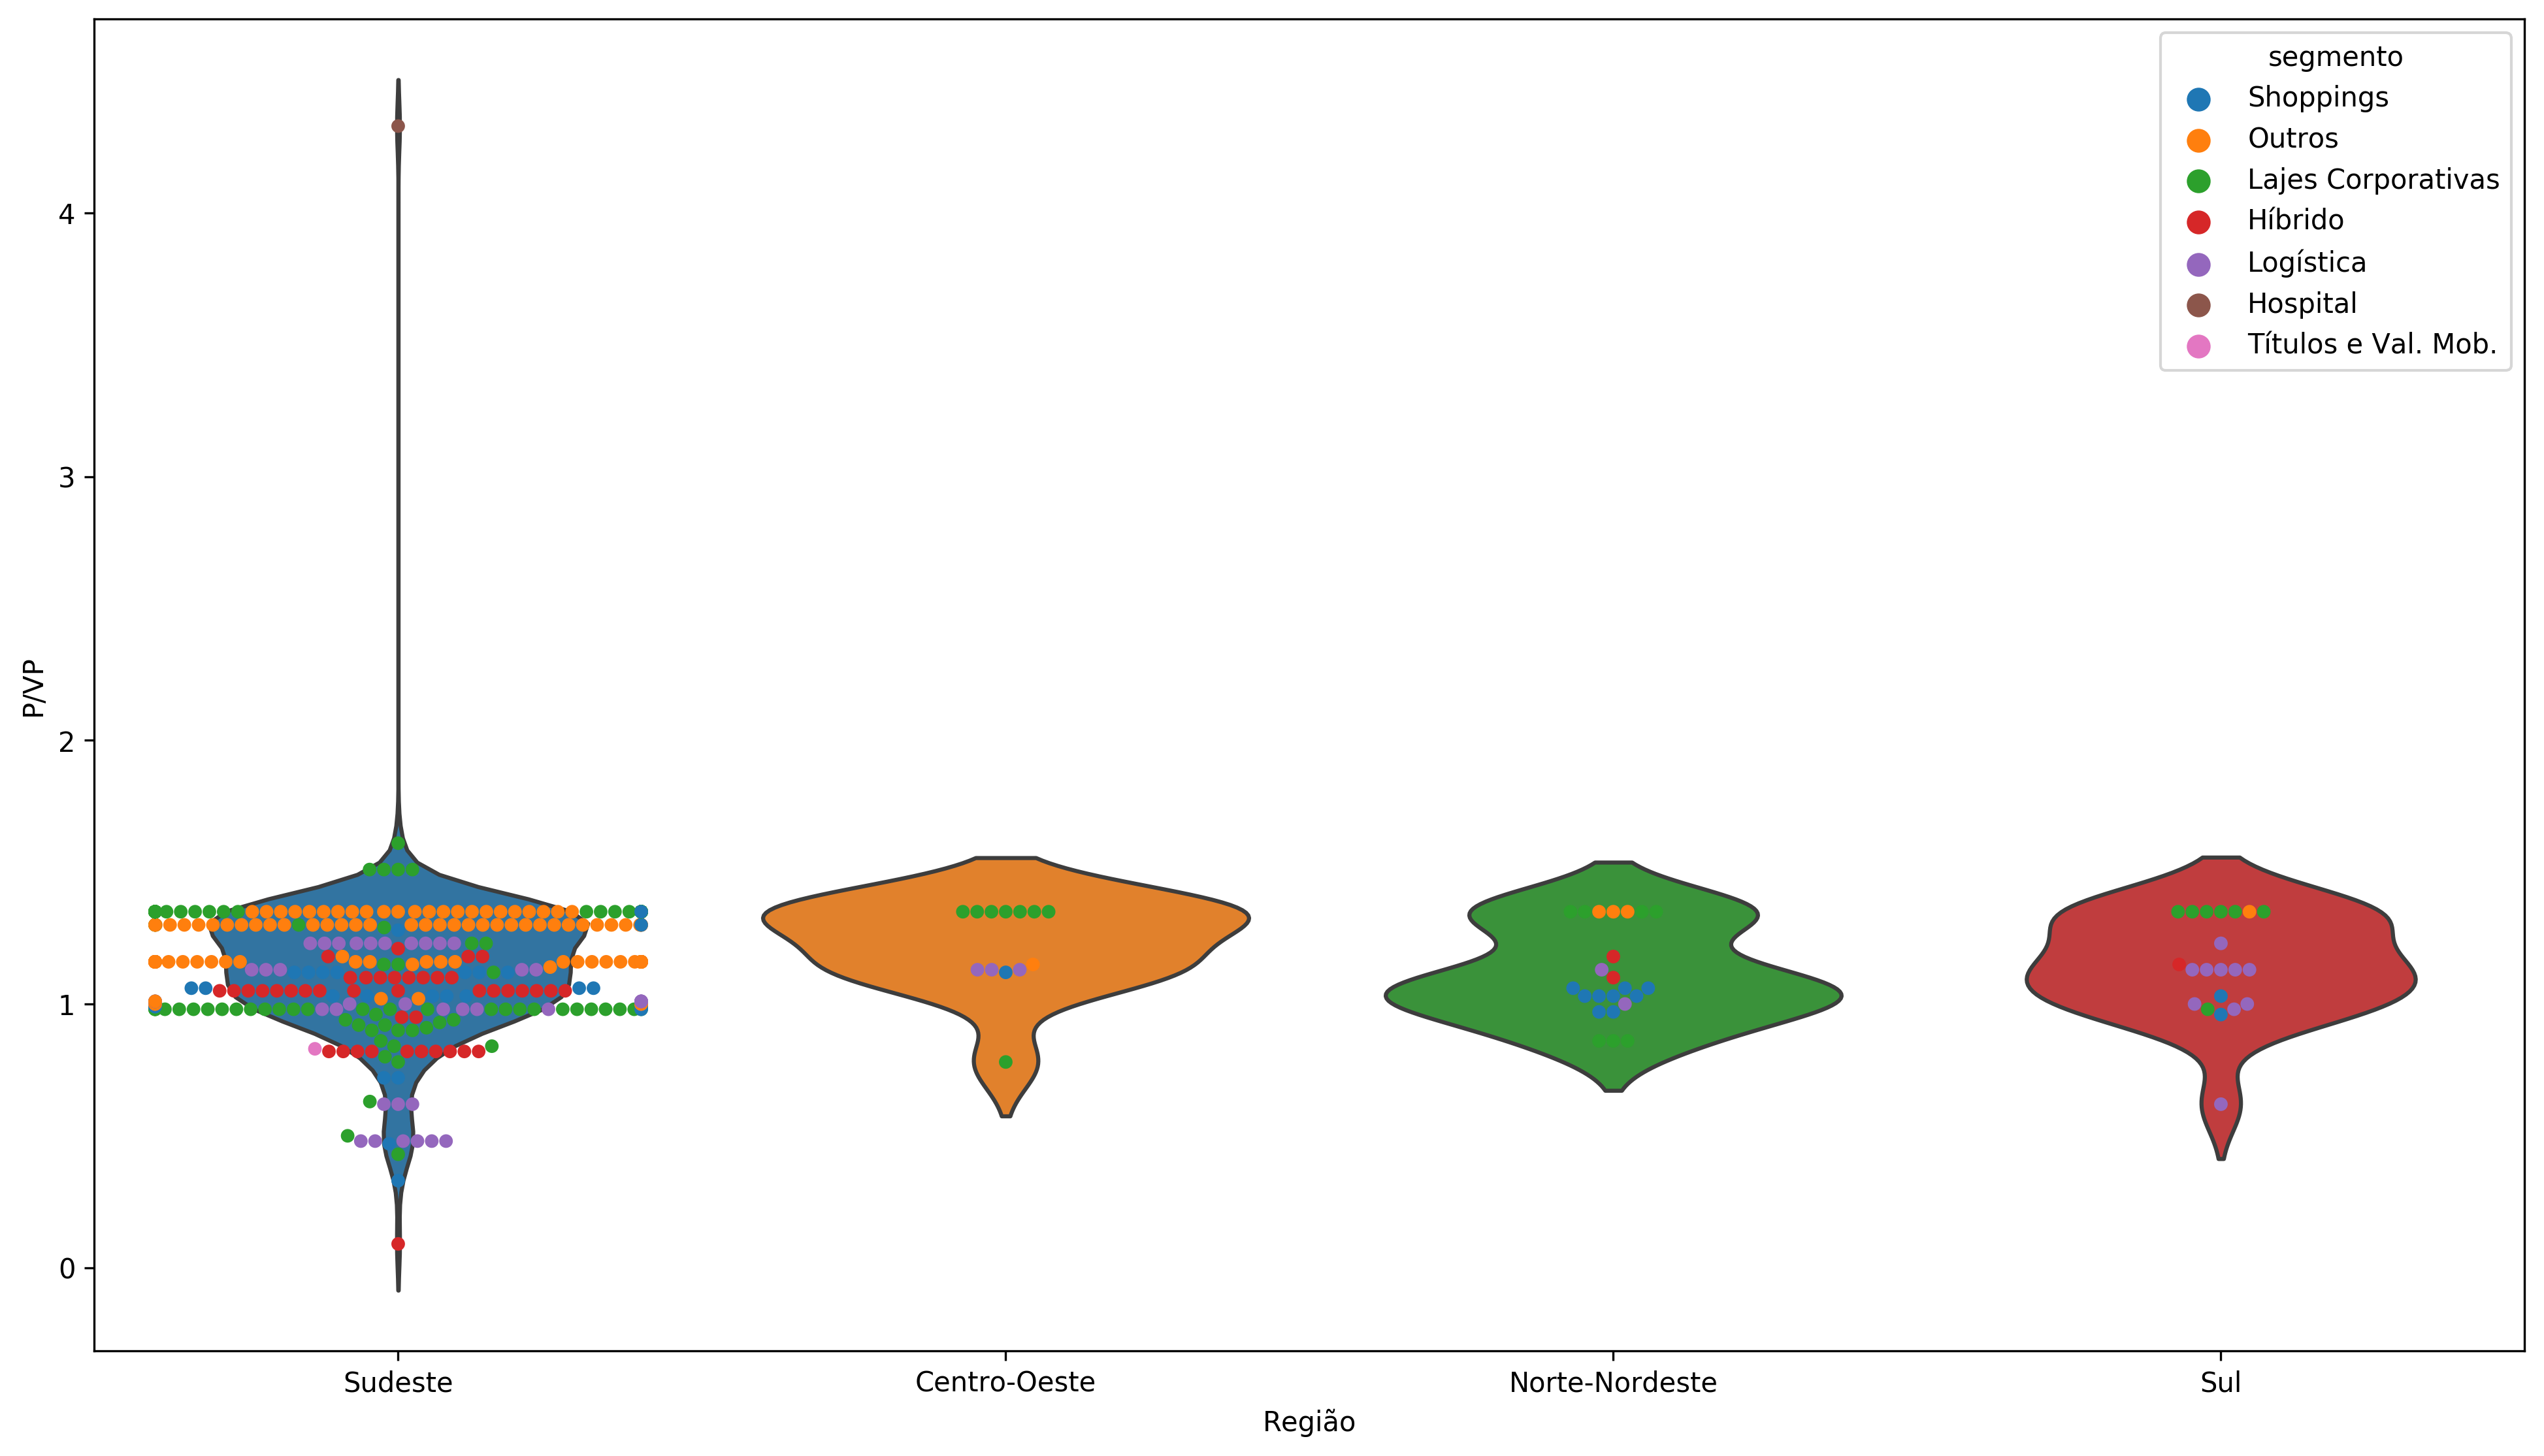

In [24]:
plt.figure(figsize=(16, 9), dpi= 300, facecolor='w', edgecolor='k')
ax = sns.violinplot(x="regiao", y="p_vp", data=assets_funds, inner=None)
ax = sns.swarmplot(x="regiao", y="p_vp", data=assets_funds, hue="segmento", edgecolor="black")
ax.set(xlabel='Região', ylabel='P/VP')

[Text(0, 0.5, 'Patrimônio Líquido (Milhões de R$)'), Text(0.5, 0, 'Região')]

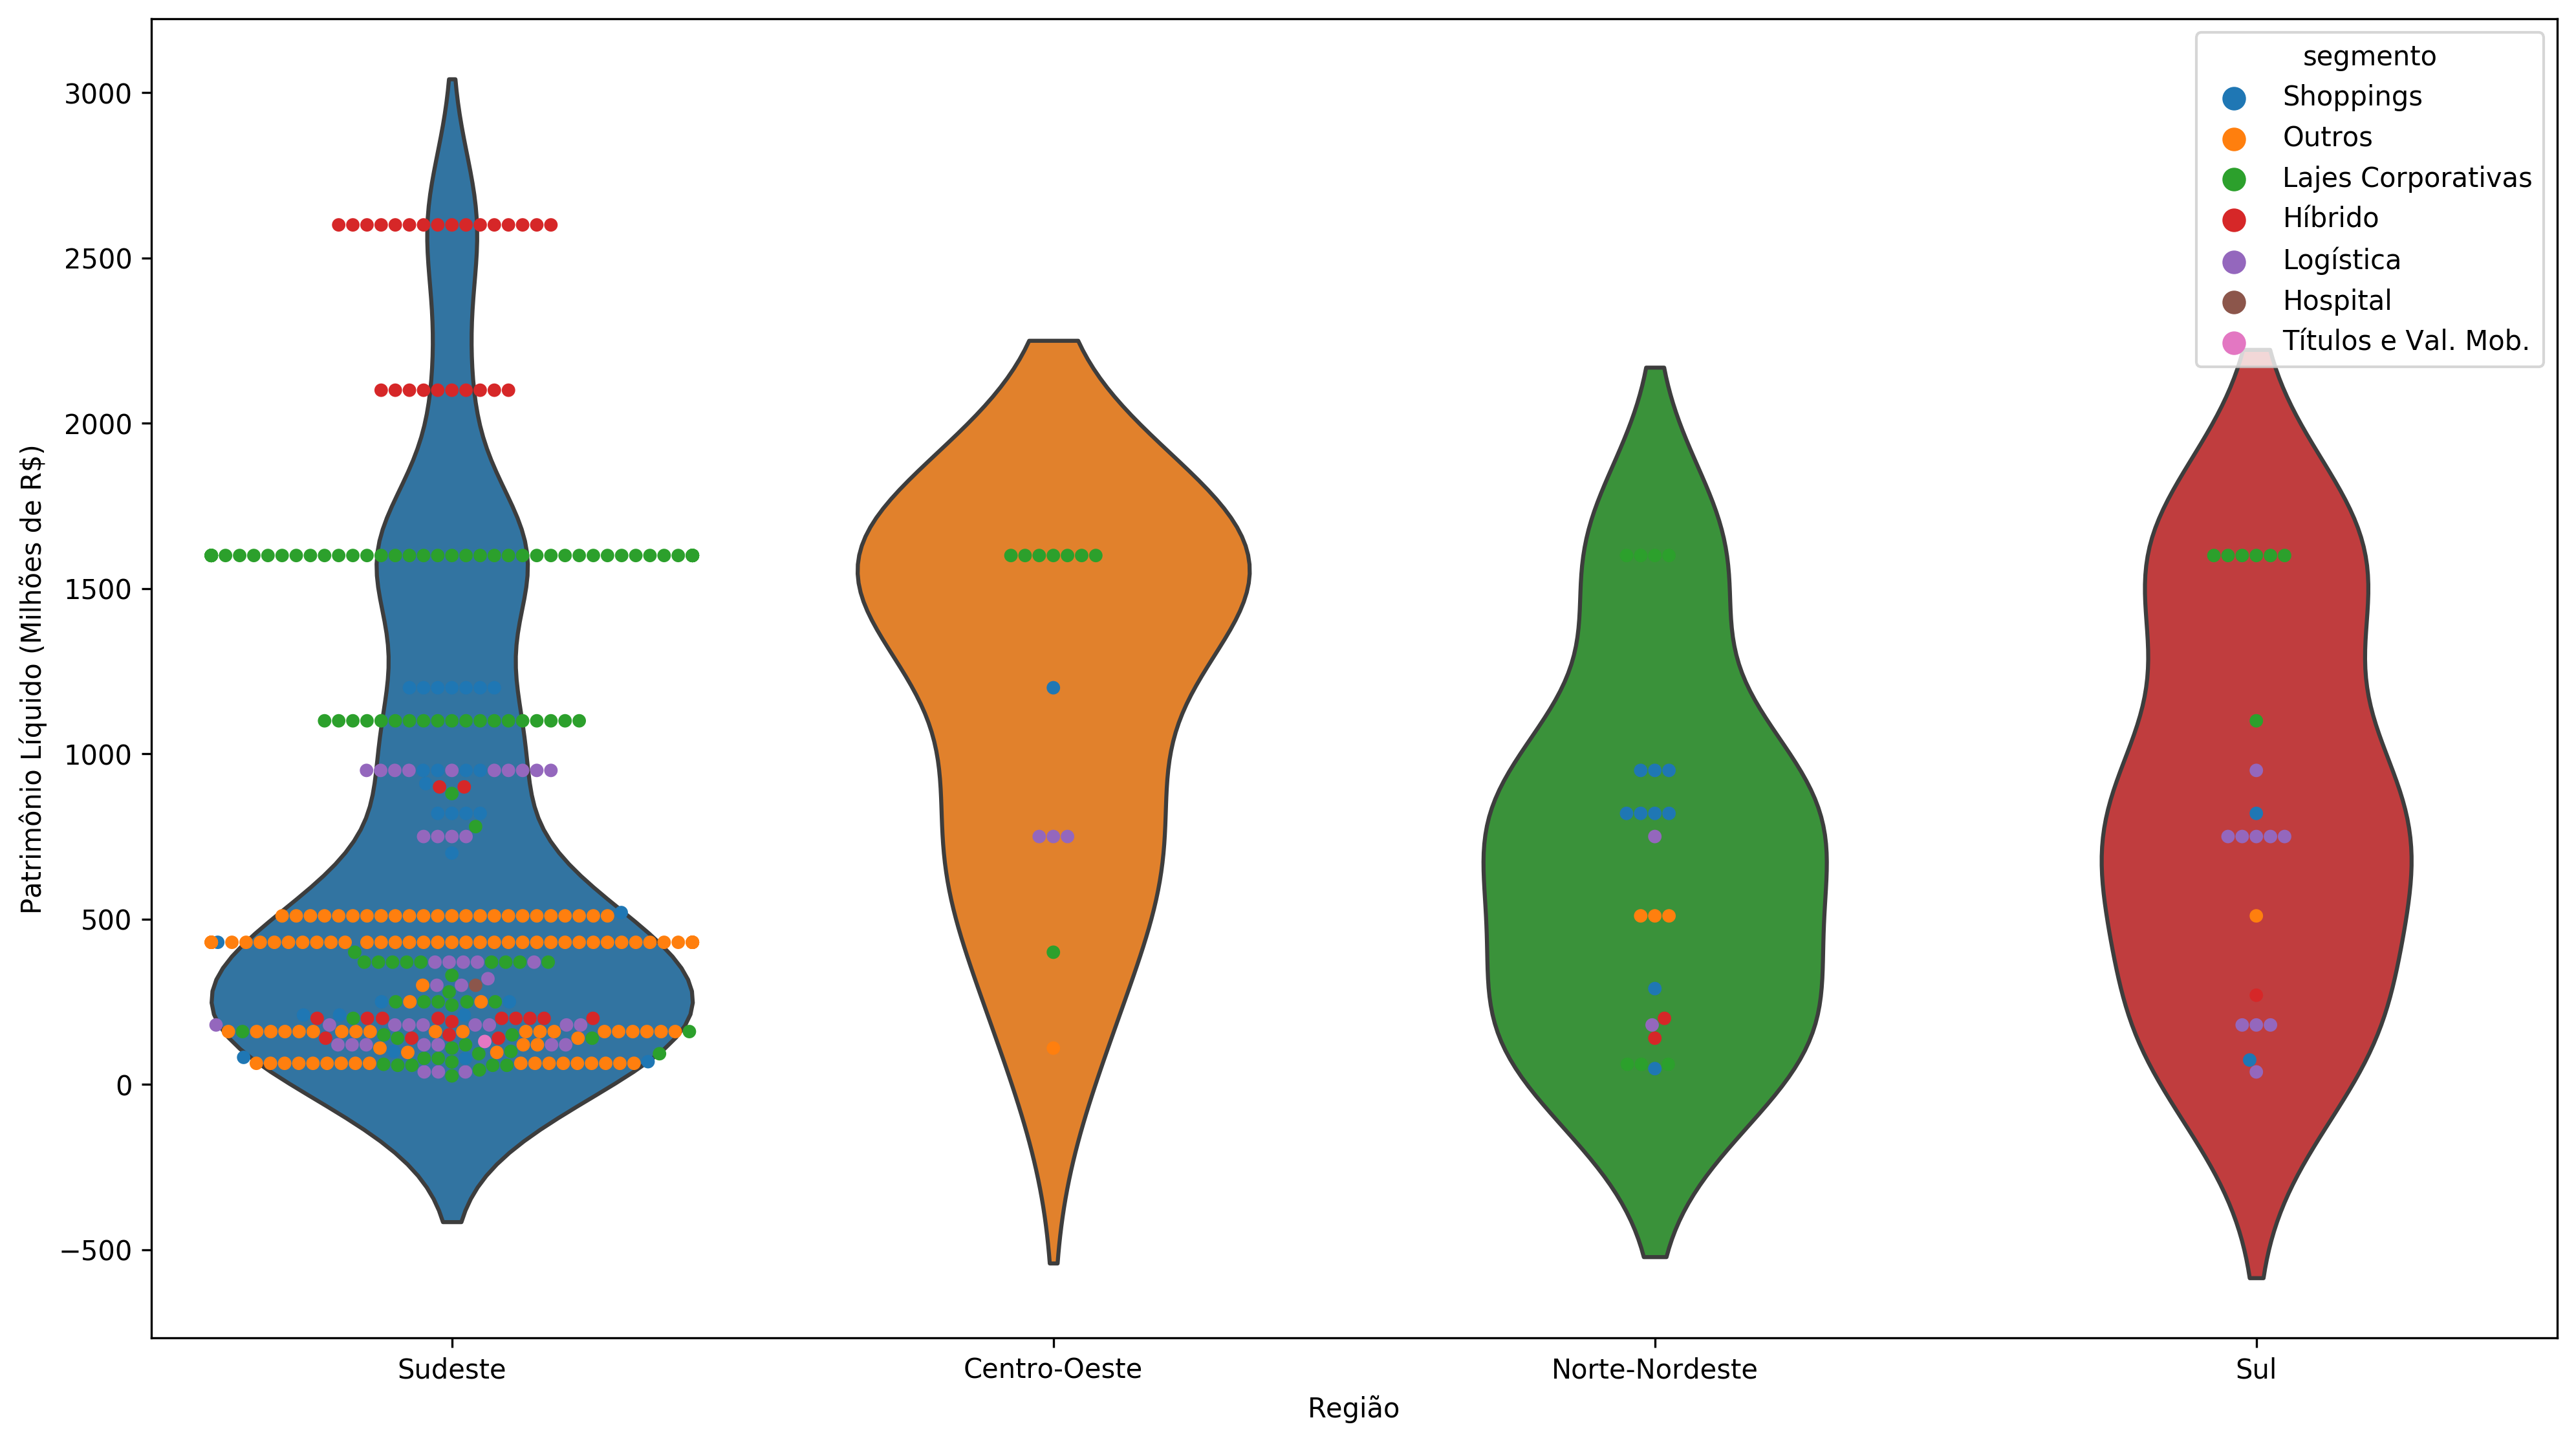

In [23]:
plt.figure(figsize=(16, 9), dpi= 300, facecolor='w', edgecolor='k')
ax = sns.violinplot(x="regiao", y="patrimonio_liquido_em_milhoes", data=assets_funds, inner=None)
ax = sns.swarmplot(x="regiao", y="patrimonio_liquido_em_milhoes", data=assets_funds, hue="segmento", edgecolor="black")
ax.set(xlabel='Região', ylabel='Patrimônio Líquido (Milhões de R$)')

[Text(0, 0.5, 'Yield de Dividendos (%)'), Text(0.5, 0, 'Região')]

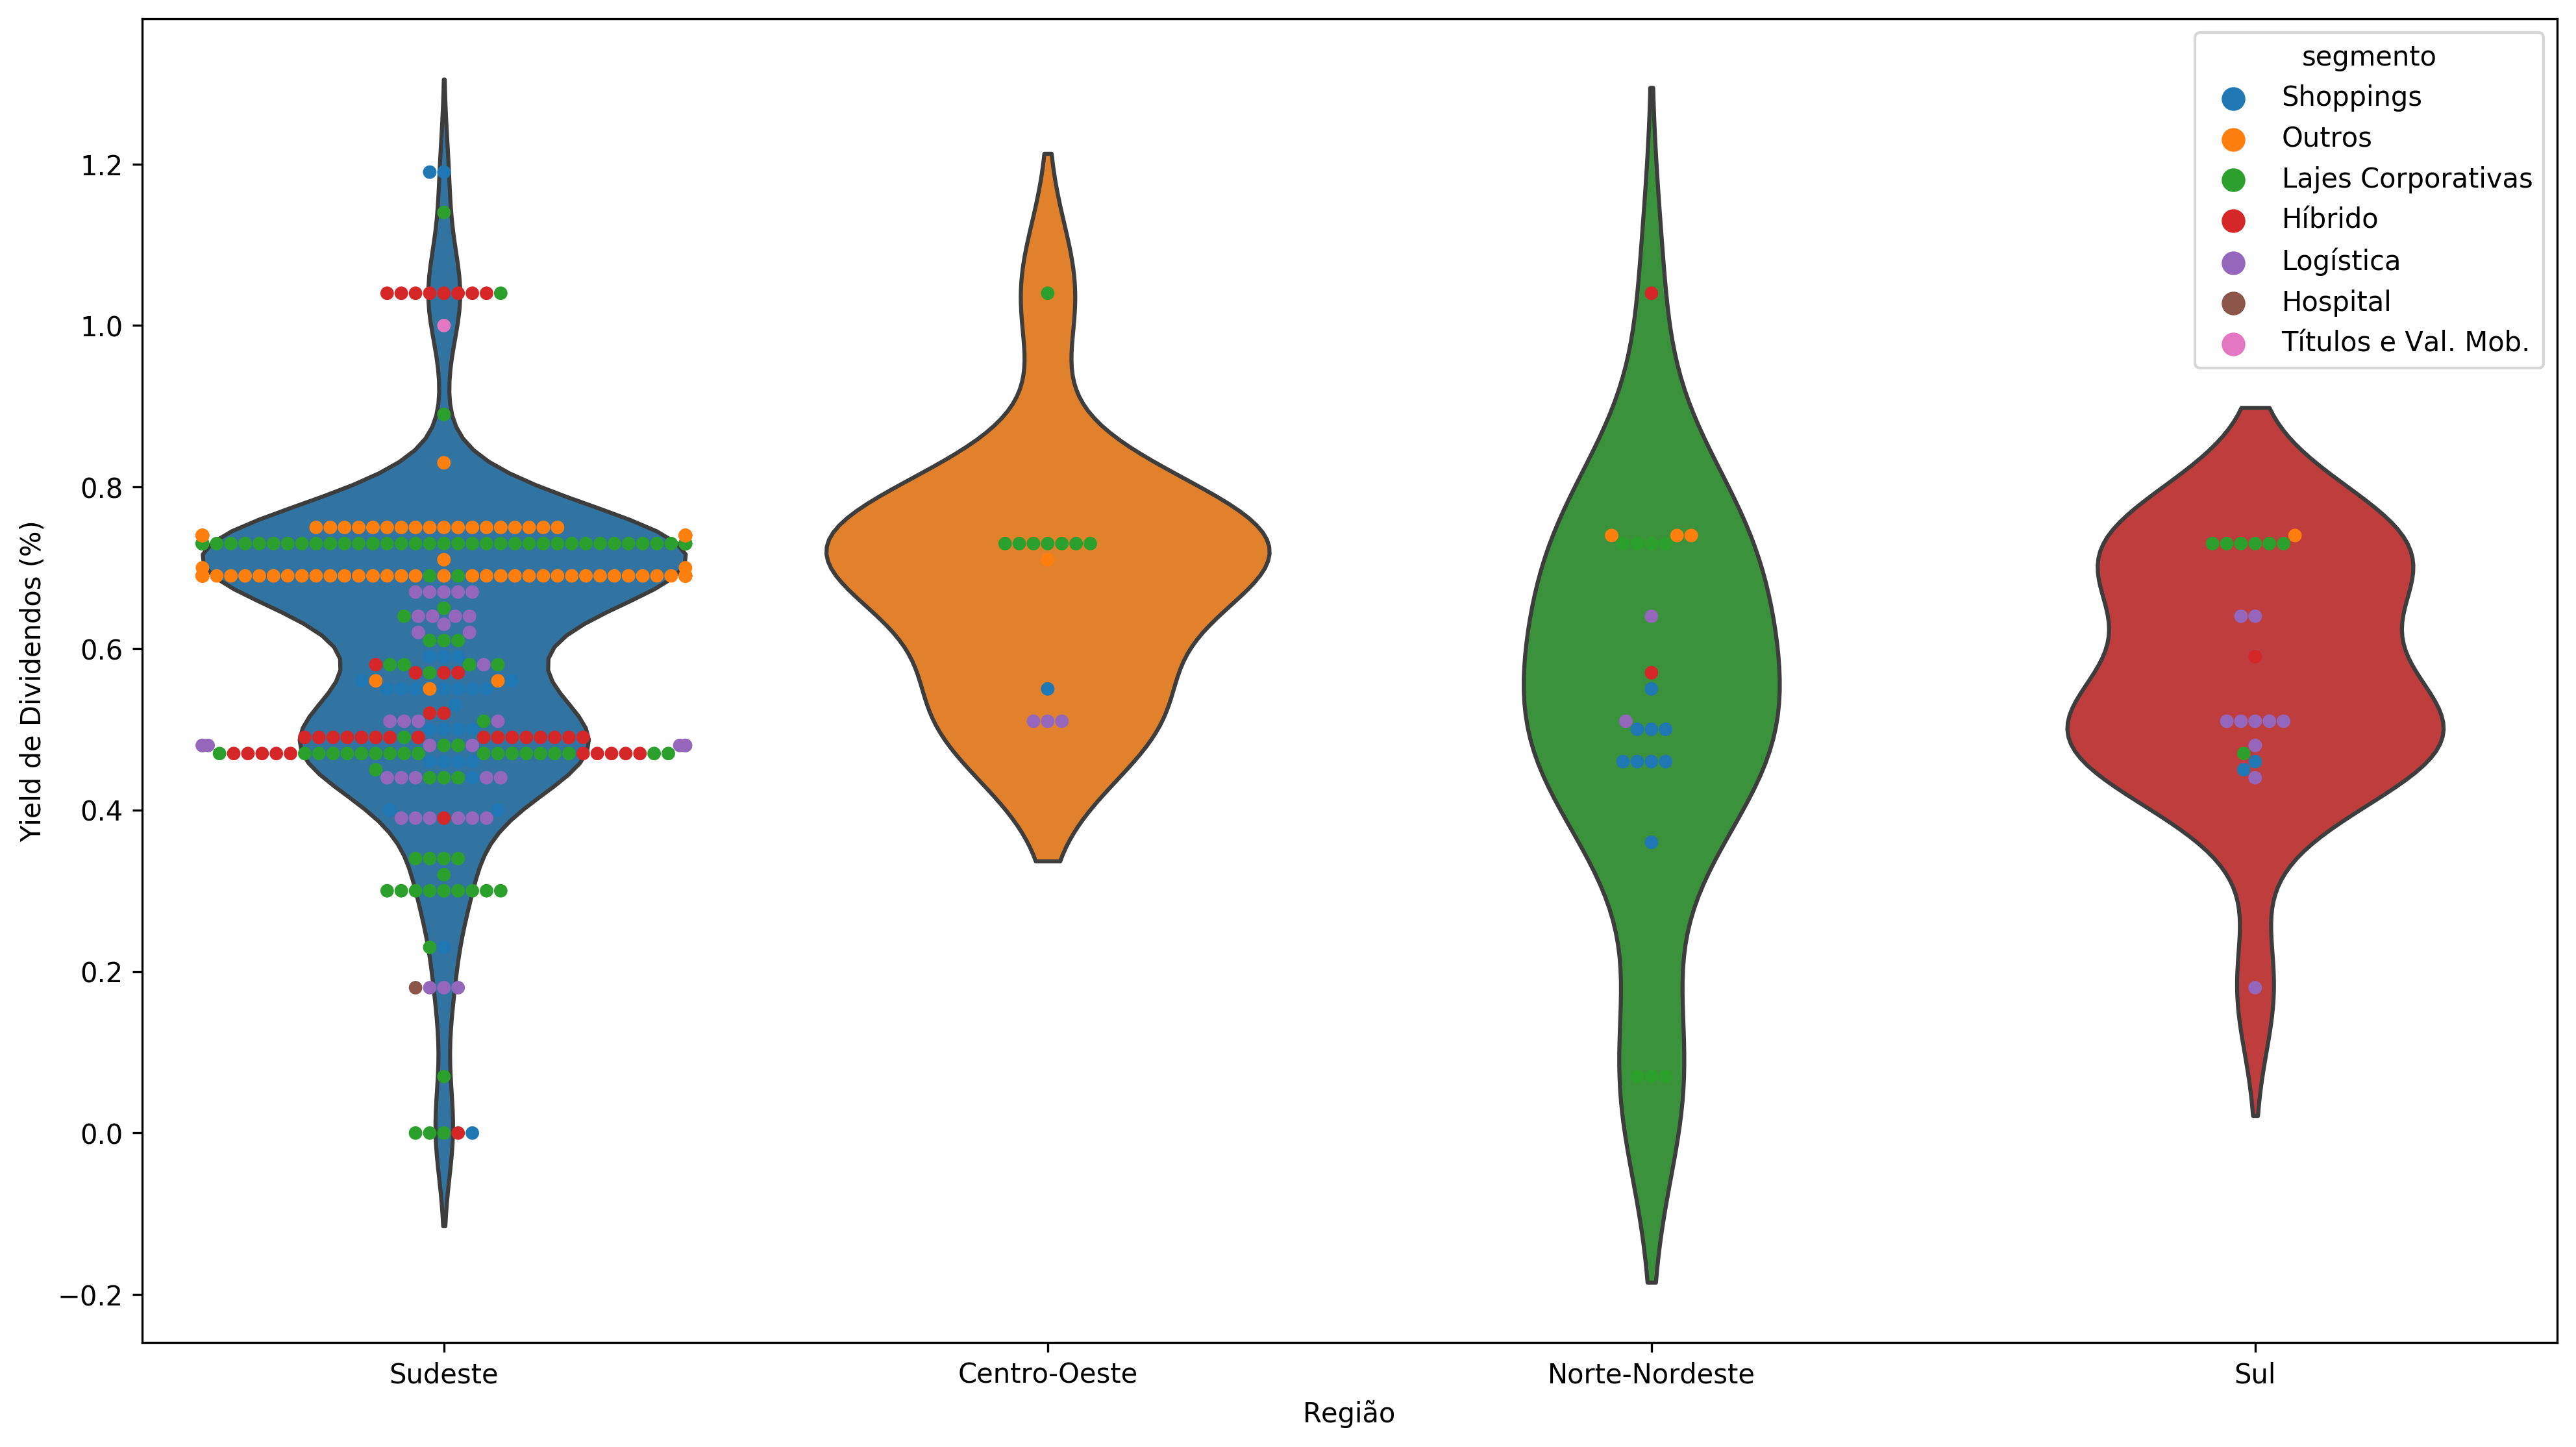

In [22]:
plt.figure(figsize=(16, 9), dpi= 300, facecolor='w', edgecolor='k')
ax = sns.violinplot(x="regiao", y="dividend_yield", data=assets_funds, inner=None)
ax = sns.swarmplot(x="regiao", y="dividend_yield", data=assets_funds, hue="segmento", edgecolor="black")
ax.set(xlabel='Região', ylabel='Yield de Dividendos (%)')

[Text(0, 0.5, 'Valorização em 12 meses (%)'), Text(0.5, 0, 'Segmento')]

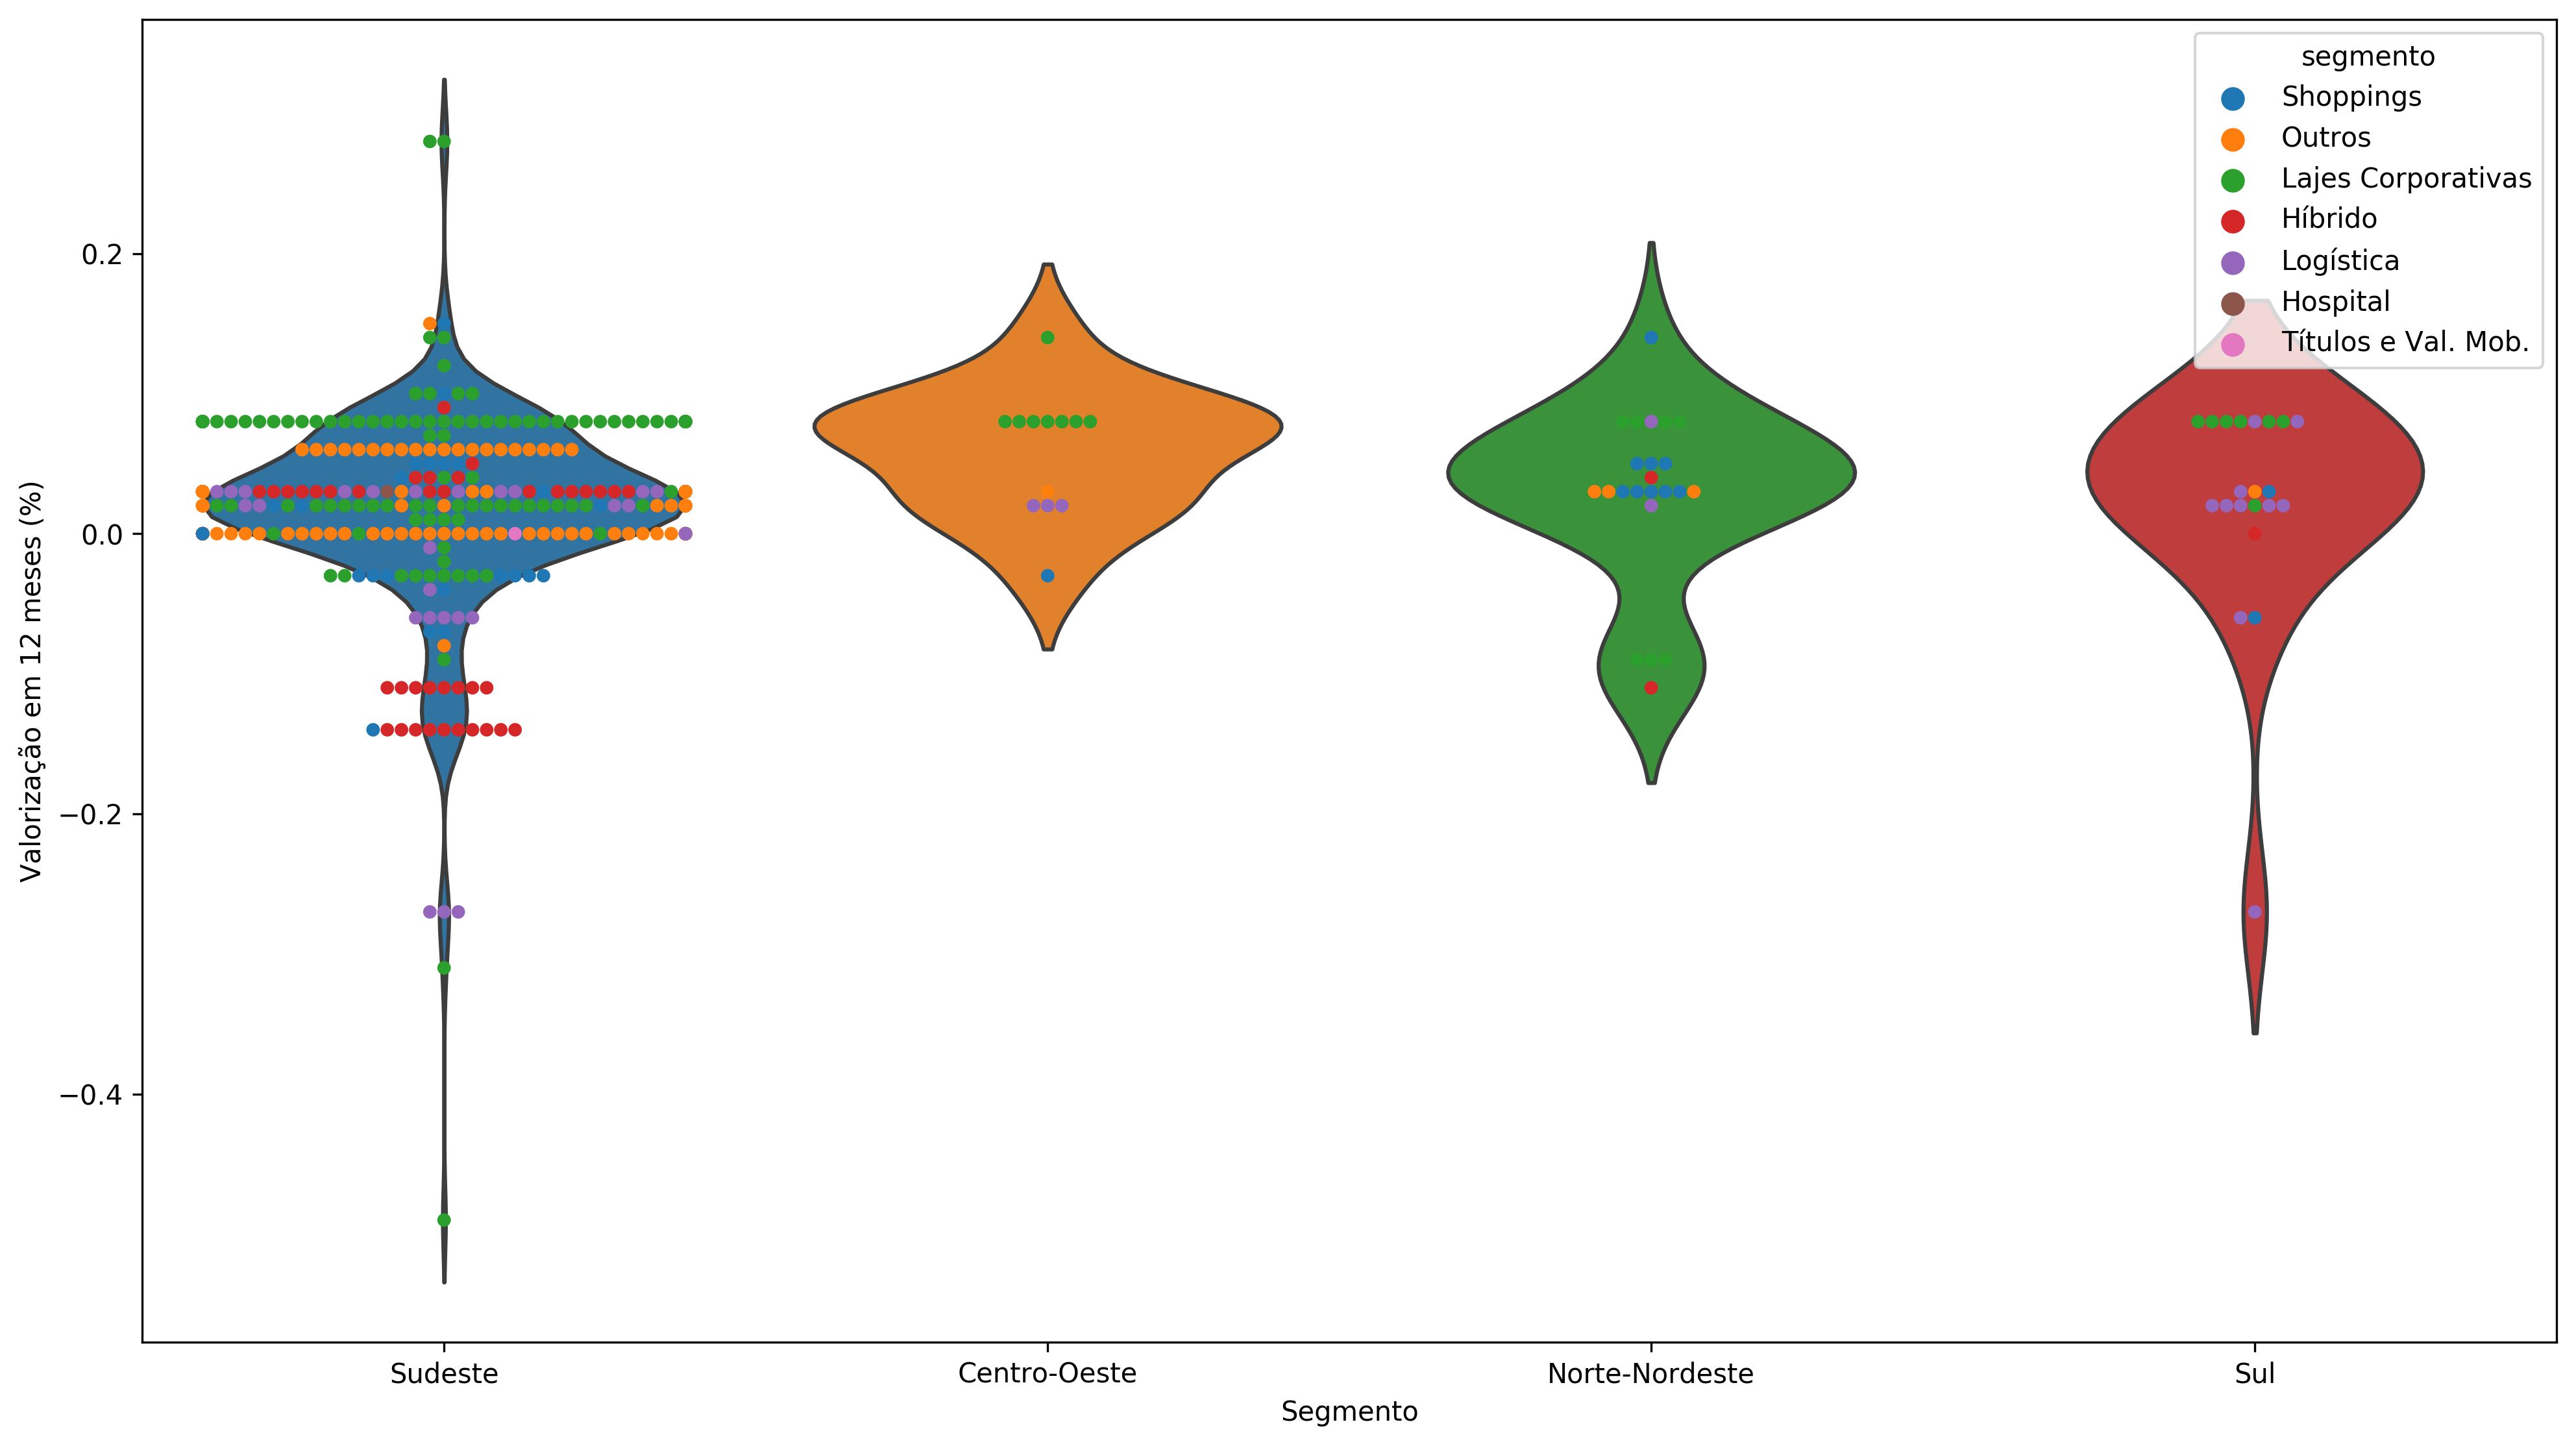

In [21]:
plt.figure(figsize=(16, 9), dpi= 300, facecolor='w', edgecolor='k')
ax = sns.violinplot(x="regiao", y="valorizacao_12_meses", data=assets_funds, inner=None)
ax = sns.swarmplot(x="regiao", y="valorizacao_12_meses", data=assets_funds, hue="segmento", edgecolor="black")
ax.set(xlabel='Segmento', ylabel='Valorização em 12 meses (%)')

In [20]:
plt.figure(figsize=(16, 9), dpi= 300, facecolor='w', edgecolor='k')
ax = sns.violinplot(x="regiao", y="valorizacao_12_meses", data=assets_funds, inner=None)
ax = sns.swarmplot(x="regiao", y="valorizacao_12_meses", data=assets_funds, color="lightsalmon", edgecolor="black")
ax.set(xlabel='Região', ylabel='Valorização em 12 meses (%)')

ValueError: Could not interpret input 'regiao'

<Figure size 4800x2700 with 0 Axes>